<a href="https://colab.research.google.com/github/dornercr/INFO371/blob/main/INFO371_Week10_Logistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   distance_km  duration_min  fuel_liters  avg_speed_kmph  delivery_delay_min
0   139.868566    183.014053    13.002576       45.855025           18.686733
1   114.469428    145.514775    12.609772       47.199095           11.066612
2   145.907542    162.914550    13.423444       53.736468           15.287448
3   180.921194    204.616265    15.932279       53.051851           27.784519
4   110.633865    133.038710    10.624147       49.895492           16.910991


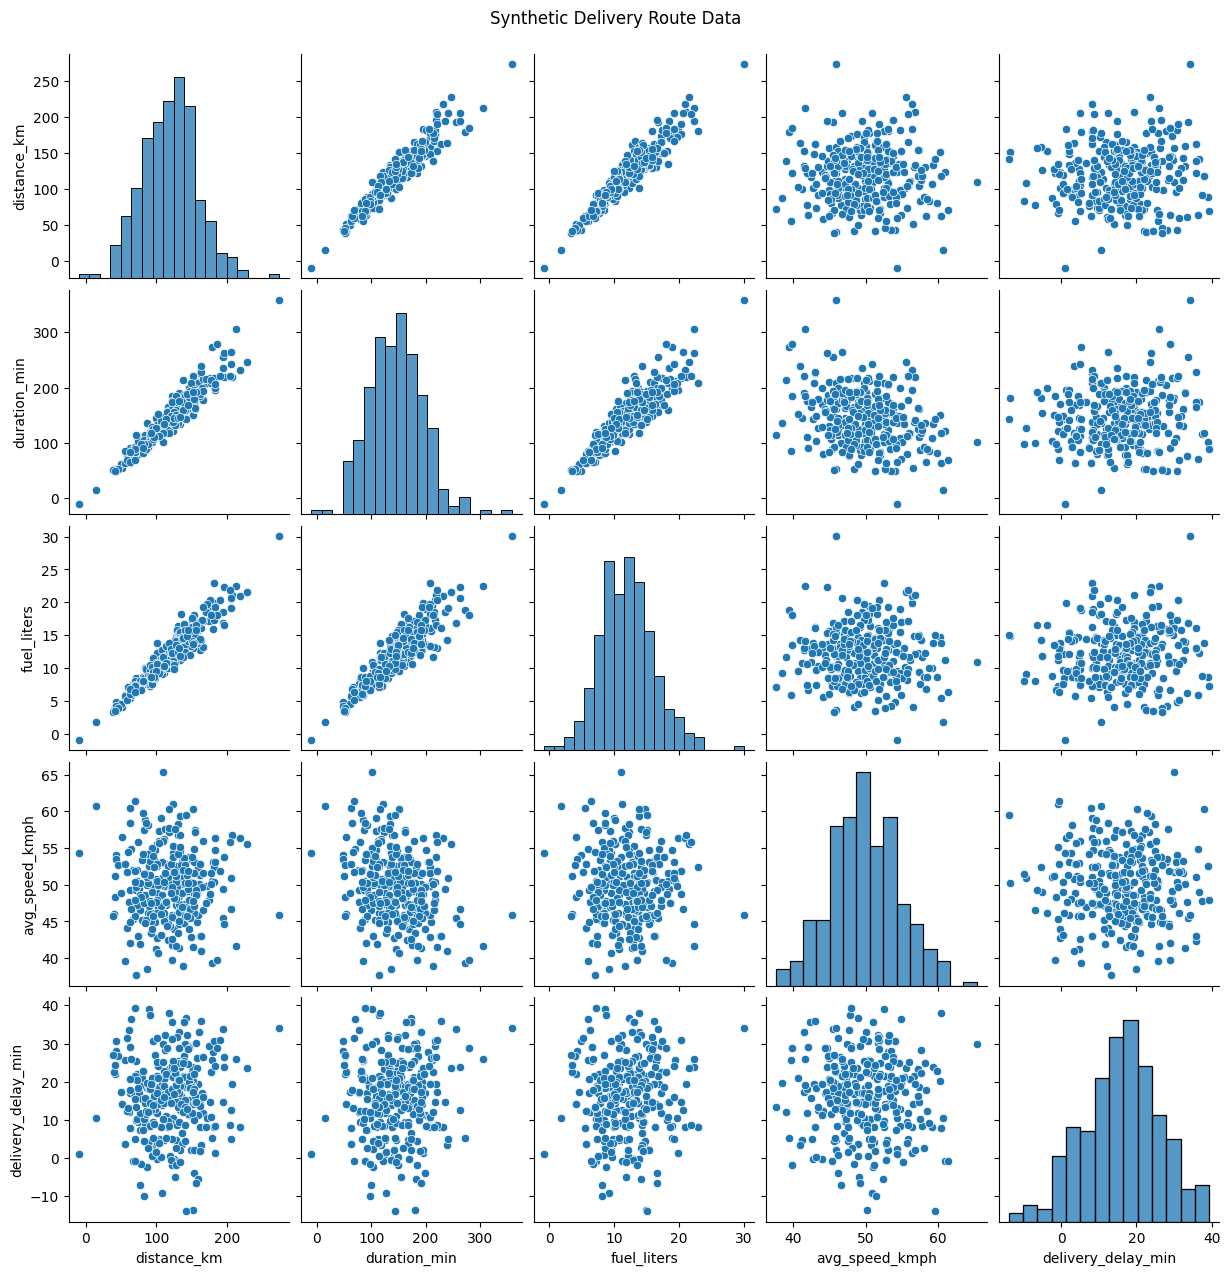

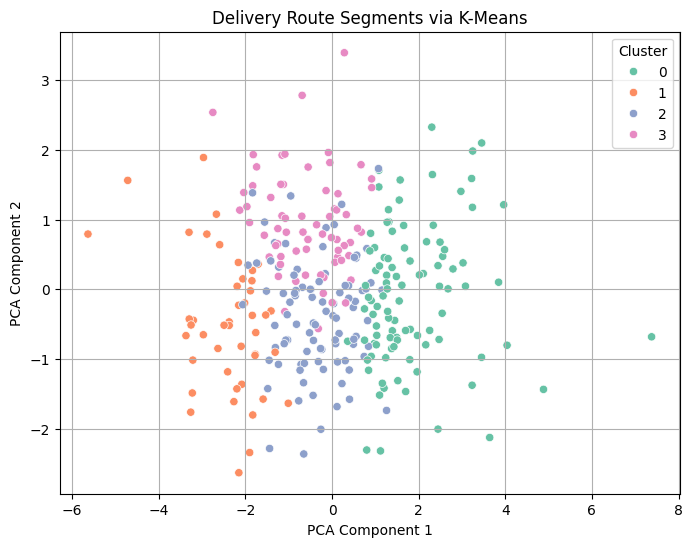


🚛 Cluster Centers (approximate route types):
   distance_km  duration_min  fuel_liters  avg_speed_kmph  delivery_delay_min
0        161.3         198.8         16.4            48.9                19.1
1         61.8          74.8          6.2            50.2                20.0
2        109.0         140.3         10.8            46.8                11.2
3        114.0         124.0         11.3            55.4                15.4


In [2]:
# 🚚 K-Means Clustering for Delivery Route Optimization
# Sector: Transportation & Logistics
# Goal: Group delivery routes by operational efficiency

# 📦 Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 🧪 Generate Synthetic Delivery Route Data
np.random.seed(42)
n_routes = 300

# Features: distance_km, duration_min, fuel_liters, avg_speed_kmph, delivery_delay_min
distance = np.random.normal(120, 40, n_routes)
duration = distance / np.random.normal(50, 5, n_routes) * 60  # convert hours to minutes
fuel = distance / np.random.normal(10, 1, n_routes)  # assume fuel efficiency
speed = distance / (duration / 60)
delay = np.random.normal(15, 10, n_routes)

# 🧾 Create DataFrame
df = pd.DataFrame({
    'distance_km': distance,
    'duration_min': duration,
    'fuel_liters': fuel,
    'avg_speed_kmph': speed,
    'delivery_delay_min': delay
})

# 🔍 Explore the Dataset
print(df.head())
sns.pairplot(df)
plt.suptitle("Synthetic Delivery Route Data", y=1.02)
plt.show()

# 🧼 Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# 🤖 Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(X_scaled)
df['cluster'] = clusters

# 📊 Visualize Clusters via PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='Set2')
plt.title("Delivery Route Segments via K-Means")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.legend(title="Cluster")
plt.show()

# 🚛 Cluster Centers (Operational Averages)
centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=df.columns[:-1])
print("\n🚛 Cluster Centers (approximate route types):")
print(centers.round(1))
